# Importando as bibliotecas necessárias:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Leitura do arquivo csv usado para a análise:

data = pd.read_csv('./sample_data/fraud.csv')

# Análise dos dados

In [3]:
# Análise dos primeiros 5 exemplos do arquivo:

data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [4]:
# Analisando os tipos de dados de cada coluna:

data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           float64
isFlaggedFraud    float64
dtype: object

In [5]:
# Separando os dados quantitativos:

quant = []
for i in data.dtypes.index:
  if data.dtypes[i] != 'object':
    quant.append(i)
  else:
    pass

In [6]:
quant

['step',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

In [7]:
# Criando um novo dataframe só com dados quantitativos 

df_quant = data[quant]
df_quant.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,9839.64,170136.0,160296.36,0.0,0.0,0.0,0.0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0.0,0.0
2,1,181.00,181.0,0.00,0.0,0.0,1.0,0.0
3,1,181.00,181.0,0.00,21182.0,0.0,1.0,0.0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0.0,0.0


In [8]:
# Informações estatísticas sobre cada uma das colunas quantitativas:

df_quant.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,28297.000000,2.829700e+04,2.829700e+04,2.829700e+04,2.829700e+04,2.829700e+04,28296.000000,28296.0
mean,6.508252,1.357405e+05,7.667026e+05,7.823551e+05,8.483811e+05,1.191306e+06,0.002969,0.0
std,2.291090,3.013167e+05,2.126123e+06,2.166615e+06,2.513869e+06,3.106440e+06,0.054405,0.0
min,1.000000,1.770000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,6.000000,5.966520e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,8.000000,1.950669e+04,1.963654e+04,3.682140e+03,0.000000e+00,0.000000e+00,0.000000,0.0
75%,8.000000,1.601022e+05,1.386575e+05,1.407606e+05,3.654323e+05,6.670935e+05,0.000000,0.0
max,8.000000,1.000000e+07,2.235231e+07,2.246600e+07,2.495524e+07,2.878359e+07,1.000000,0.0


In [9]:
df_quant.median()

step                  8.00
amount            19506.69
oldbalanceOrg     19636.54
newbalanceOrig     3682.14
oldbalanceDest        0.00
newbalanceDest        0.00
isFraud               0.00
isFlaggedFraud        0.00
dtype: float64

In [10]:
# Analisando a única coluna qualitativa relevante (tipo)

data.groupby('type').step.count()

type
CASH_IN      5027
CASH_OUT     6109
DEBIT         513
PAYMENT     13913
TRANSFER     2735
Name: step, dtype: int64

# Tratamento dos dados

In [11]:
# Descobrindo a quantidade de valores nulos em cada coluna

data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           1
isFlaggedFraud    1
dtype: int64

In [12]:
# Deletando as linhas com valores nulos

data = data.dropna()

In [13]:
# Provando que as linhas nulas foram excluídas

data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

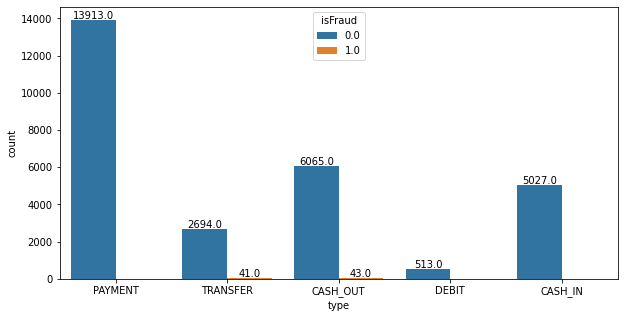

In [16]:
# Gráfico de Fraudes por tipo de transação
# Nota-se que só existiram fraudes em transferências e saques

fig, ax = plt.subplots(figsize=(10, 5))
classe = sns.countplot(x='type', hue='isFraud', data=data, ax=ax);
for i in classe.patches:
  classe.annotate(i.get_height(),
               (i.get_x() + i.get_width() / 2, i.get_height()),
               ha = 'center', va = 'baseline', color='black', xytext=(0,1),
               textcoords='offset pixels')

In [42]:
# Biblioteca para tratar dados categóricos

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [43]:
# Tratando os dados categóricos da coluna type para numéricos

le = LabelEncoder()
data['new_type'] = le.fit_transform(data['type'])

In [44]:
# Dataframe com a nova coluna new_type com valores numéricos (última coluna)

data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,new_type,Fraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,3,No
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,3,No
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0,4,Yes
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0,1,Yes
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0,3,No


In [45]:
# Função para transformar o valor binário de isFraud para categórico

def transformar_fraud(val):
  if val == 1:
    return 'Yes'
  else:
    return 'No'

data['Fraud'] = data['isFraud'].map(transformar_fraud)

In [58]:
# Dataframe com a nova coluna Fraud e seus valores (yes, no)

data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,new_type,Fraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,3,No
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,3,No
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0,4,Yes
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0,1,Yes
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0,3,No


In [59]:
from sklearn.preprocessing import StandardScaler

dados_padronizado = data[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'new_type']]
scaler = StandardScaler()

dados_padronizado_2 = scaler.fit_transform(dados_padronizado)

In [63]:
data_modelo = pd.DataFrame(dados_padronizado_2, index = dados_padronizado.index, columns= dados_padronizado.columns)

In [64]:
data_modelo.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,new_type
0,-2.404201,-0.417845,-0.280602,-0.287124,-0.337489,-0.38351,0.662010
1,-2.404201,-0.444313,-0.350630,-0.352162,-0.337489,-0.38351,0.662010
2,-2.404201,-0.449900,-0.360539,-0.361109,-0.337489,-0.38351,1.409058
3,-2.404201,-0.449900,-0.360539,-0.361109,-0.329063,-0.38351,-0.832086
4,-2.404201,-0.411776,-0.341080,-0.347315,-0.337489,-0.38351,0.662010


# Modelo preditivo detector de fraudes

In [65]:
# Bibliotecas para machine learning

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [66]:
# Separando as features que serão usadas no modelo

X = data_modelo
y = data['Fraud']

In [67]:
# Dividindo os dados entre treino e validação(teste)

X_treino, X_valid, y_treino, y_valid = train_test_split(X, y, test_size=0.5)

In [68]:
# Instanciando o modelo de Floresta aleatória de classificação

modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)

In [69]:
# Treinando o modelo com os dados de treino

modelo.fit(X_treino, y_treino)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [70]:
# Fazendo a validação com os dados de validação(teste)

p = modelo.predict(X_valid)
p

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [71]:
# Exibindo a acurácia do modelo preditivo para detecção de fraudes

pred = np.mean(y_valid == p)
print(f'Accuracy {pred*100}%')

Accuracy 99.85156912637828%


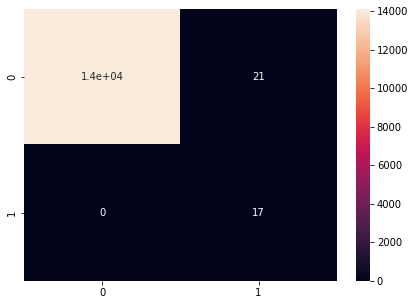

In [72]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(p, y_valid)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)